# Numpy

In [3]:
import numpy as np

In [4]:
x = [2, 4, 6, 8]
y = np.array(x)

In [5]:
print(type(x), x)
print(type(y), y)

<class 'list'> [2, 4, 6, 8]
<class 'numpy.ndarray'> [2 4 6 8]


In [7]:
print(x[1:3])
print(y[1:3])

[4, 6]
[4 6]


In [9]:
# creating a new array from slice

print(y[[0,2]])

[2 6]


In [11]:
# slice by condition

print(y[(y>3)])

[4 6 8]


In [19]:
# new array of already existing

z = [*y, *y]
print(z)

[2, 4, 6, 8, 2, 4, 6, 8]


In [20]:
print(x*5)
print(y*5)

[2, 4, 6, 8, 2, 4, 6, 8, 2, 4, 6, 8, 2, 4, 6, 8, 2, 4, 6, 8]
[10 20 30 40]


In [21]:
print(x**2)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [24]:
print(y**2)

[ 4 16 36 64]


## Matrices

In [25]:
matrix = [[0, 1, 2], [3, 4, 5]]
np_matrix = np.array(matrix)

In [27]:
print(matrix[0][0])

0


In [30]:
# we can select elements in different ways (only Numpy array)

print(np_matrix[0][0])
print(np_matrix[0, 0])

0
0


## Numpy random

In [32]:
# random matrix (normal distribution)

print(np.random.randn(3, 3))

[[ 0.24565364  0.87792108  0.12254114]
 [-0.30956495 -1.80485408 -0.59935848]
 [-0.1825724   0.20453542  0.57997527]]


In [34]:
# uniform distribution

print(np.random.rand(3, 3))

[[0.18790336 0.34203725 0.06703095]
 [0.32852451 0.68664727 0.0396999 ]
 [0.73581051 0.04763537 0.71402237]]


## Numpy arrange

In [36]:
print(np.arange(0, 8, 0.1))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9]


In [39]:
# numpy arrange is faster than common range

%timeit np.arange(0, 10000)
%timeit range(0, 10000)

9.84 µs ± 1.19 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
288 ns ± 43.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


# SciPy

## Optimization

In [2]:
from scipy import optimize

In [3]:
def f(x):
    return (x[0] - 3.2) ** 2 + (x[1] - 0.1) ** 2 + 3  # min is 3

print(f((3.2, 0.1)))  # min point

3.0


In [4]:
# we can find the min point using scipy

x_min = optimize.minimize(f, (5, 5))
print(x_min)  # a lot of info

      fun: 3.0000000000011435
 hess_inv: array([[ 0.94055055, -0.16183475],
       [-0.16183475,  0.55944947]])
      jac: array([-2.05636024e-06,  5.36441803e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([3.19999896, 0.10000026])


In [5]:
# and we can get the min point

print(x_min.x)

[3.19999896 0.10000026]


In [19]:
# and aslo we can find the max point

def f(x):
    return (-x)**2

def g(x):
    return -f(x)

x_max = optimize.minimize(g, [0])
print(x_max)

      fun: -0.0
 hess_inv: array([[1]])
      jac: array([-1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0.])


In [92]:
# other ways

# the rosenbrock function
def f(x):   
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2
    
print(f([1, 1]))

0.0


In [93]:
result = optimize.brute(f, ((-5, 5), (-5, 5)))
print(result)

[0.99999324 1.00001283]


In [94]:
print(optimize.differential_evolution(f, ((-5, 5), (-5, 5))))

     fun: 7.395570986446986e-32
 message: 'Optimization terminated successfully.'
    nfev: 3423
     nit: 113
 success: True
       x: array([1., 1.])


In [95]:
# calc.  gradient

import numpy as np

def g(x):
        return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

In [96]:
# checking gradient

print(optimize.check_grad(f, g, [2, 2]))

2.384185791015625e-07


In [97]:
# gradient way

print(optimize.fmin_bfgs(f, [2, 2], fprime=g))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
[1.00000582 1.00001285]


In [99]:
# the same, common methods

print(optimize.minimize(f, [2, 2]))
print()
print(optimize.minimize(f, [2, 2], method='BFGS'))

      fun: 1.7838045907468558e-11
 hess_inv: array([[0.95489061, 1.90006632],
       [1.90006632, 4.27872378]])
      jac: array([9.88093227e-07, 2.41749084e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([1.00000573, 1.00001265])

      fun: 1.7838045907468558e-11
 hess_inv: array([[0.95489061, 1.90006632],
       [1.90006632, 4.27872378]])
      jac: array([9.88093227e-07, 2.41749084e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([1.00000573, 1.00001265])


In [100]:
print(optimize.minimize(f, [2, 2], method='Nelder-Mead'))

 final_simplex: (array([[0.99998568, 0.99996682],
       [1.00002149, 1.00004744],
       [1.0000088 , 1.00003552]]), array([1.23119954e-10, 2.50768082e-10, 3.59639951e-10]))
           fun: 1.2311995365407462e-10
       message: 'Optimization terminated successfully.'
          nfev: 91
           nit: 46
        status: 0
       success: True
             x: array([0.99998568, 0.99996682])


## Linalg

In [46]:
from scipy import linalg

In [51]:
# solving systems (example: aX = b)

a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])

X = linalg.solve(a, b)
print(X)

[ 2. -2.  9.]


In [57]:
b = np.dot(a, X)
print(b)
print(type(b))

[ 2.  4. -1.]
<class 'numpy.ndarray'>


In [58]:
# SVD

X = np.random.randn(4, 3)
U, D, V = linalg.svd(X)
print(U.shape, D.shape, V.shape)
print(type(U), type(D), type(V))

(4, 4) (3,) (3, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


# Matplotlib

In [60]:
from matplotlib import pylab as plt

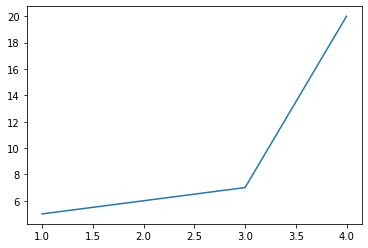

In [62]:
plt.plot([1, 2, 3, 4], [5, 6, 7, 20])
plt.show()

## Math functions using numpy

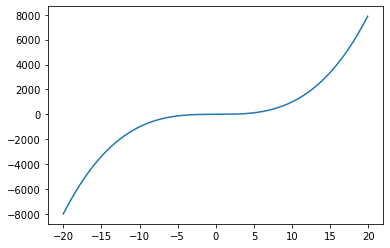

In [66]:
# plottnig x^3 func

x = np.arange(-20, 20, 0.1)
y = x**3
plt.plot(x, y)
plt.show()

# All libs together

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [86]:
# plotting exp

x = np.arange(0, 10, 2)  # points for plotting function
# y = np.exp(-x/3)


# irl we have a noise 

y = np.exp(-x/3) + np.random.randn(len(x)) * 0.05

print(x[:5])
print(y[:5])

[0 2 4 6 8]
[0.95948518 0.56428708 0.23866998 0.15012487 0.11066291]


In [87]:
f = interpolate.interp1d(x, y, kind='cubic')
xnew = np.arange(0, 8, 0.1)
ynew = f(xnew)

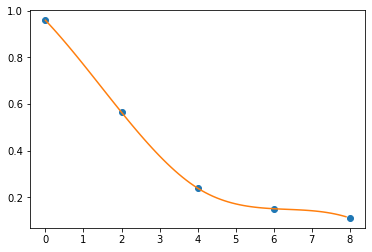

In [88]:
# we can see just interpolate when we have a noise isn't enough

plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()